In [94]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [95]:
import random
a=random.sample(range(200,568000), 10000)


In [96]:
dframe=pd.read_csv(r"D:\Reviews.csv",header=0)
dframe1=dframe.loc[a]
dframe1.reset_index(drop=True,inplace=True)

In [97]:
#print(dframe1)


In [98]:
file1 = dframe1[['Score','Text']]

In [99]:
#file1.head(10)

In [100]:
#file1['Score']=file1['Score'].astype(int)

In [101]:
file1['Score']=file1['Score']/3

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
file1.head(10)

,Score,Text
0,1.666667,We had this for lunch for two days and both of...
1,1.333333,They're pricey and they break easily when you'...
2,1.333333,This tea is so good and it smells yummy. I hi...
3,1.666667,"One of my top favorites, it's infused with coc..."
4,1.666667,I LOVE these breakfast links. I grew up eating...
5,1.333333,This bone is huge! Literally bigger my forearm...
6,1.666667,I love Earl Grey tea and will pretty much try ...
7,1.666667,When I took my gluten-free habits to my boyfri...
8,1.666667,This water is the best tasting water I have ev...
9,1.666667,Great stuff! True Licorice with Molasses! Th...


In [103]:
file1['Score'] = file1['Score'].apply(np.floor)

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
file1.head(10)

,Score,Text
0,1.0,We had this for lunch for two days and both of...
1,1.0,They're pricey and they break easily when you'...
2,1.0,This tea is so good and it smells yummy. I hi...
3,1.0,"One of my top favorites, it's infused with coc..."
4,1.0,I LOVE these breakfast links. I grew up eating...
5,1.0,This bone is huge! Literally bigger my forearm...
6,1.0,I love Earl Grey tea and will pretty much try ...
7,1.0,When I took my gluten-free habits to my boyfri...
8,1.0,This water is the best tasting water I have ev...
9,1.0,Great stuff! True Licorice with Molasses! Th...


In [105]:
file1['Text'] = file1['Text'].str.lower()

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
file1.head(10)

,Score,Text
0,1.0,we had this for lunch for two days and both of...
1,1.0,they're pricey and they break easily when you'...
2,1.0,this tea is so good and it smells yummy. i hi...
3,1.0,"one of my top favorites, it's infused with coc..."
4,1.0,i love these breakfast links. i grew up eating...
5,1.0,this bone is huge! literally bigger my forearm...
6,1.0,i love earl grey tea and will pretty much try ...
7,1.0,when i took my gluten-free habits to my boyfri...
8,1.0,this water is the best tasting water i have ev...
9,1.0,great stuff! true licorice with molasses! th...


In [107]:
#removing punctuation
file1['Text'] = file1['Text'].str.replace('[^\w\s]','')

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [108]:
file1.head(10)

,Score,Text
0,1.0,we had this for lunch for two days and both of...
1,1.0,theyre pricey and they break easily when youre...
2,1.0,this tea is so good and it smells yummy i hig...
3,1.0,one of my top favorites its infused with cocon...
4,1.0,i love these breakfast links i grew up eating ...
5,1.0,this bone is huge literally bigger my forearm ...
6,1.0,i love earl grey tea and will pretty much try ...
7,1.0,when i took my glutenfree habits to my boyfrie...
8,1.0,this water is the best tasting water i have ev...
9,1.0,great stuff true licorice with molasses thes...


In [109]:
#file1['Text'] = file1['Text'].str.replace('0123456789','')

In [110]:
file1.head(10)

,Score,Text
0,1.0,we had this for lunch for two days and both of...
1,1.0,theyre pricey and they break easily when youre...
2,1.0,this tea is so good and it smells yummy i hig...
3,1.0,one of my top favorites its infused with cocon...
4,1.0,i love these breakfast links i grew up eating ...
5,1.0,this bone is huge literally bigger my forearm ...
6,1.0,i love earl grey tea and will pretty much try ...
7,1.0,when i took my glutenfree habits to my boyfrie...
8,1.0,this water is the best tasting water i have ev...
9,1.0,great stuff true licorice with molasses thes...


In [111]:
#removing stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [112]:
file1['Text'] = file1['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
file1.head(10)

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Score,Text
0,1.0,lunch two days us loved living new orleans yea...
1,1.0,theyre pricey break easily youre stuffing toy ...
2,1.0,tea good smells yummy highly recommend really ...
3,1.0,one top favorites infused coconut unique flavo...
4,1.0,love breakfast links grew eating introduced fa...
5,1.0,bone huge literally bigger forearm fullgrown g...
6,1.0,love earl grey tea pretty much try brand least...
7,1.0,took glutenfree habits boyfriends house fiance...
8,1.0,water best tasting water ever used plant leave...
9,1.0,great stuff true licorice molasses good value ...


In [113]:
file1.Text=file1.Text.str.replace('\d+','')

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [114]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


In [115]:
file1.columns

Index(['Score', 'Text'], dtype='object')

In [116]:
#emp_file = file1[['Text']]

In [117]:
#temp_file.head()


In [118]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

file1['Text_lemmatized'] = file1.Text.apply(lemmatize_text)

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [119]:
#temp_file.head(10)

In [120]:
file1.head(10)

,Score,Text,Text_lemmatized
0,1.0,lunch two days us loved living new orleans yea...,"[lunch, two, day, u, loved, living, new, orlea..."
1,1.0,theyre pricey break easily youre stuffing toy ...,"[theyre, pricey, break, easily, youre, stuffin..."
2,1.0,tea good smells yummy highly recommend really ...,"[tea, good, smell, yummy, highly, recommend, r..."
3,1.0,one top favorites infused coconut unique flavo...,"[one, top, favorite, infused, coconut, unique,..."
4,1.0,love breakfast links grew eating introduced fa...,"[love, breakfast, link, grew, eating, introduc..."
5,1.0,bone huge literally bigger forearm fullgrown g...,"[bone, huge, literally, bigger, forearm, fullg..."
6,1.0,love earl grey tea pretty much try brand least...,"[love, earl, grey, tea, pretty, much, try, bra..."
7,1.0,took glutenfree habits boyfriends house fiance...,"[took, glutenfree, habit, boyfriend, house, fi..."
8,1.0,water best tasting water ever used plant leave...,"[water, best, tasting, water, ever, used, plan..."
9,1.0,great stuff true licorice molasses good value ...,"[great, stuff, true, licorice, molasses, good,..."


In [121]:
file1['Joined'] = file1.Text_lemmatized.apply(', '.join)

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
#file1.head(10)

In [123]:
file1.Joined=file1.Joined.str.replace(',',' ')

In [126]:


from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()


    
#Fit and transform
X_1 = vectorizer.fit_transform(file1.Joined)
  

In [127]:
display(X_1)

<10000x23719 sparse matrix of type '<class 'numpy.int64'>'
	with 339688 stored elements in Compressed Sparse Row format>

In [129]:
y= file1['Score']

In [132]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3)

In [134]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression() 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\Prashant Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(y_test,y_pred)

0.899

In [139]:
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [142]:
X_test.shape

(3000, 23719)

In [143]:
y_test.shape

(3000,)

In [154]:
x = X_test[:,0]
x.shape

(3000, 1)

In [156]:
## SVM

In [157]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [158]:
SVML = svm.SVC(kernel="linear")
scores = cross_val_score(SVML, X_train, y_train, cv=5)
accuracySVML = scores.mean()
print("Support Vector Machine Accuracy (Linear Kernel) :", accuracySVML)

Support Vector Machine Accuracy (Linear Kernel) : 0.8711474982530968


In [159]:
##Naive Bayes

In [160]:
from sklearn.naive_bayes import MultinomialNB

In [161]:
MNB = MultinomialNB()
scores = cross_val_score(MNB, X_train, y_train, cv=5)
accuracyMNB = scores.mean()
print("Multinomial Naive Bayes Accuracy :", accuracyMNB)

Multinomial Naive Bayes Accuracy : 0.8661437216476713


TypeError: float() argument must be a string or a number, not 'function'

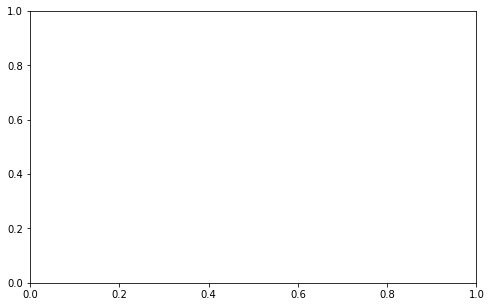

In [165]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
fig = sns.barplot(y=[accuracyMNB, accuracySVML, accuracy_score], x=["MultinomialNB", "SVMaccuracy", "LogisticAccuracy"], ax=ax1)
fig.set(xlabel="Naive Bayes Method", ylabel="Accuracy Logistic")